In [1]:
from features.loss import pipeline
from sklearn.metrics import classification_report, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import os
import matplotlib.pyplot as plt

## Configuration

In [2]:
model_name='spkrec-xvect-voxceleb'
dir='utterance'
root=os.path.join('results/classifier',model_name,dir)

## Data preparation

In [3]:
train, val, test=pipeline(model_name,dir,root)

## Visualization

In [4]:
def visualize(dataset):
    plt.scatter(dataset[:,0],dataset[:,1],c=dataset[:,2])
    plt.xlabel('loss')
    plt.ylabel('confidence')
    plt.show()

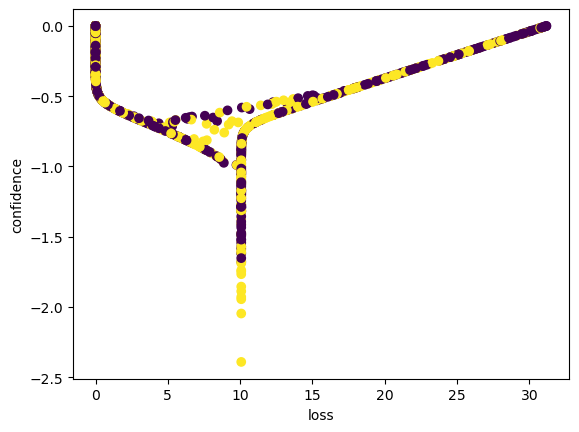

In [5]:
visualize(train)

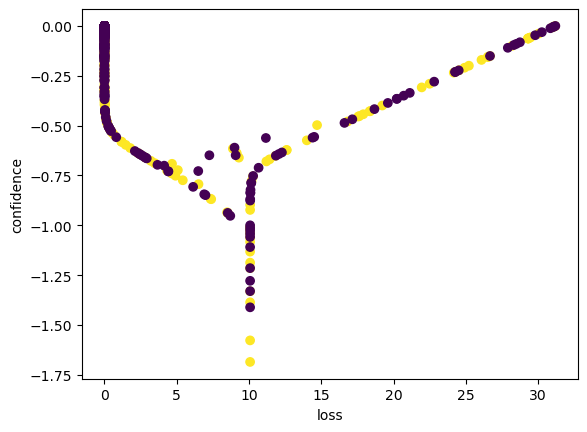

In [6]:
visualize(val)

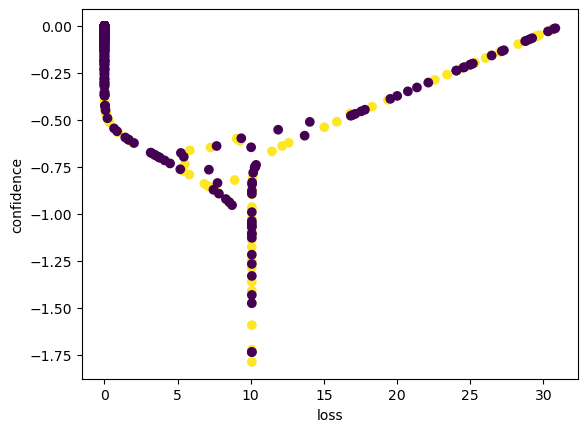

In [7]:
visualize(test)

## Evaluation

In [8]:
def classify(classifier, train, test):
    classifier.fit(train[:,:-1], train[:,-1])
    pred=classifier.predict(test[:,:-1])
    print(classification_report(test[:,-1],pred))
    RocCurveDisplay.from_estimator(classifier,test[:,:-1],test[:,-1])
    plt.show()

              precision    recall  f1-score   support

         0.0       0.50      0.90      0.64      2000
         1.0       0.49      0.10      0.17      2000

    accuracy                           0.50      4000
   macro avg       0.49      0.50      0.40      4000
weighted avg       0.49      0.50      0.40      4000



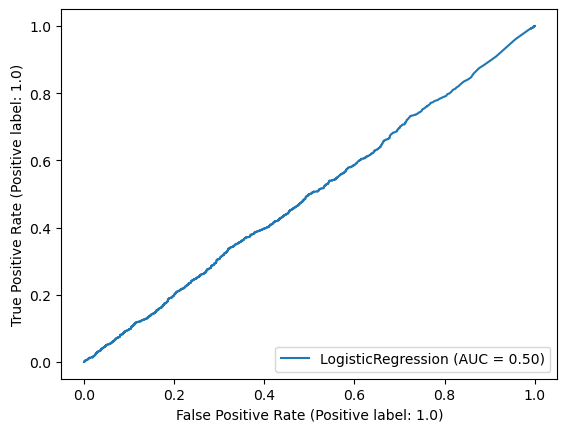

In [9]:
classify(LogisticRegression(),train,test)

              precision    recall  f1-score   support

         0.0       0.50      0.97      0.66      2000
         1.0       0.46      0.02      0.04      2000

    accuracy                           0.50      4000
   macro avg       0.48      0.50      0.35      4000
weighted avg       0.48      0.50      0.35      4000



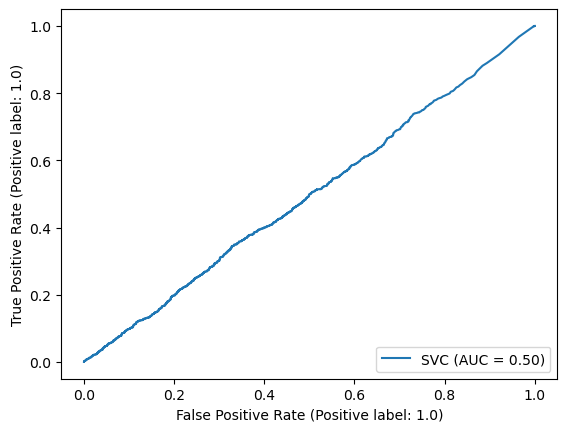

In [10]:
classify(SVC(),train,test)

              precision    recall  f1-score   support

         0.0       0.49      0.57      0.53      2000
         1.0       0.48      0.40      0.44      2000

    accuracy                           0.48      4000
   macro avg       0.48      0.48      0.48      4000
weighted avg       0.48      0.48      0.48      4000



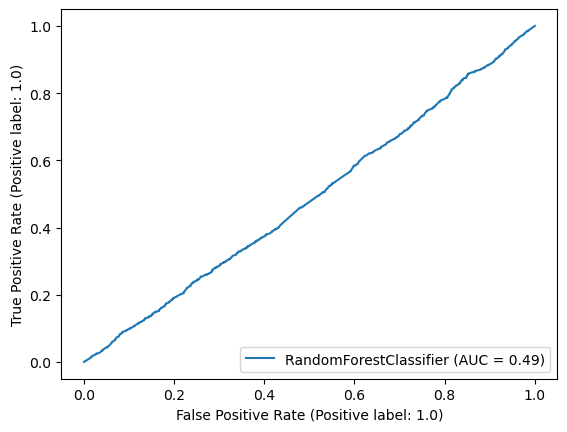

In [11]:
classify(RandomForestClassifier(),train,test)

              precision    recall  f1-score   support

         0.0       0.49      0.50      0.50      2000
         1.0       0.49      0.48      0.49      2000

    accuracy                           0.49      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.49      0.49      0.49      4000



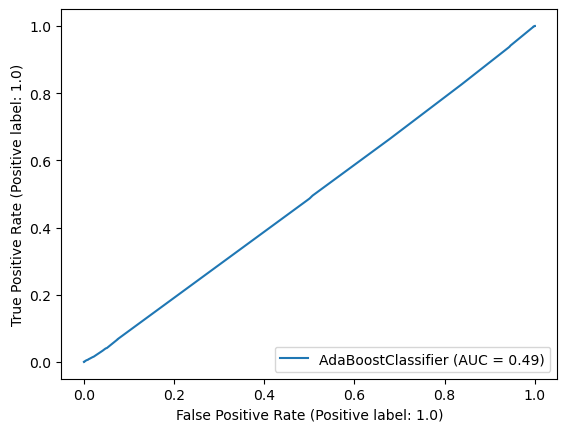

In [12]:
classify(AdaBoostClassifier(),train,test)

              precision    recall  f1-score   support

         0.0       0.50      0.43      0.46      2000
         1.0       0.50      0.57      0.53      2000

    accuracy                           0.50      4000
   macro avg       0.50      0.50      0.49      4000
weighted avg       0.50      0.50      0.49      4000



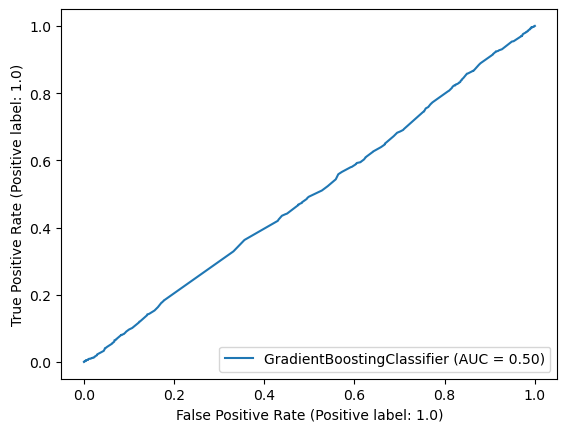

In [13]:
classify(GradientBoostingClassifier(),train,test)

              precision    recall  f1-score   support

         0.0       0.50      0.92      0.65      2000
         1.0       0.48      0.07      0.12      2000

    accuracy                           0.50      4000
   macro avg       0.49      0.50      0.38      4000
weighted avg       0.49      0.50      0.38      4000



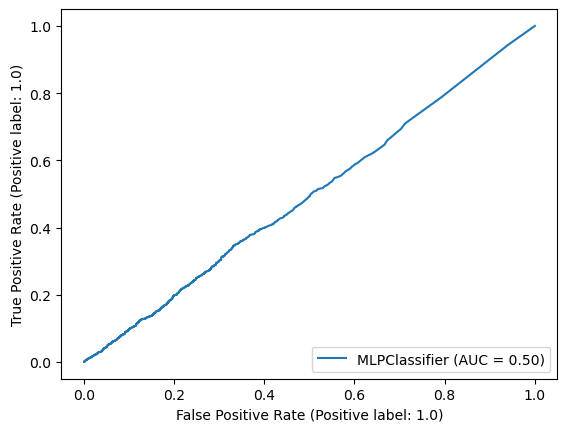

In [14]:
classify(MLPClassifier(),train,test)